# Initial Exploration of RHoMIS Data-Set and Rasterisation #

In [51]:
import os
import pandas as pd
import numpy as np
import matplotlib as plt
import geopandas as gpd


In [6]:
rhomis_indicator=pd.read_csv(os.path.join("data", "rhomis_data","RHoMIS_Indicators.csv"), encoding="latin1", low_memory=False)

In [8]:
rhomis_indicator.head()

,ID_PROJ,ID_COUNTRY,YEAR,ITERATION,SURVEY_ID,ID_HH,GPS_LAT,GPS_LON,GPS_ALT,Country,...,value_livestock_prod_consumed_USD_PPP_pHH_Yr,Market_Orientation,Livestock_Orientation,Food_Availability_kCal_MAE_day,Food_Self_Sufficiency_kCal_MAE_day,NrofMonthsWildFoodCons,GHGEmissions,Gender_MaleControl,Gender_FemaleControl,NFertInput
0,CFM,TZ,2015,1,TZ_CFM_2015,TZ_2015_CFM_1_1,NaN,NaN,NaN,Tanzania,...,0.000000,1.000000,0.049505,3650.565755,0.000000,0,NaN,0.000000,1.000000,NaN
1,CFM,TZ,2015,1,TZ_CFM_2015,TZ_2015_CFM_2_1,NaN,NaN,NaN,Tanzania,...,0.000000,1.000000,0.000000,3632.448997,0.000000,4,143.934000,0.499999,0.500001,75.0
2,CFM,TZ,2015,1,TZ_CFM_2015,TZ_2015_CFM_3_1,NaN,NaN,NaN,Tanzania,...,0.000000,0.670729,0.087108,5314.779021,1750.000000,1,3248.700905,1.000000,0.000000,20.0
3,CFM,TZ,2015,1,TZ_CFM_2015,TZ_2015_CFM_4_1,NaN,NaN,NaN,Tanzania,...,0.000000,0.000000,0.000000,257.234727,257.234727,0,887.156057,NaN,NaN,15.0
4,CFM,TZ,2015,1,TZ_CFM_2015,TZ_2015_CFM_5_1,NaN,NaN,NaN,Tanzania,...,23.102694,0.931377,0.695041,925.310354,22.070240,0,14275.030776,1.000000,0.000000,50.0


In [32]:
#spatially_explicit_rhomis=rhomis_indicator[rhomis_indicator["GPS_LAT"].notnull()&rhomis_indicator["GPS_LON"].notnull()]
# Alternatively if we want to do subsetting in the same way as R 
not_null_latitude_rows=rhomis_indicator["GPS_LAT"].notnull()
not_null_longitude_rows=rhomis_indicator["GPS_LON"].notnull()
spatially_explicit_rhomis=rhomis_indicator.loc[not_null_latitude_rows&not_null_longitude_rows,:]

In [34]:
spatially_explicit_rhomis.shape[1] # number of columns
spatially_explicit_rhomis.shape[0] # number of rows

# .isin([]) is the equivalent of %in% in R



53

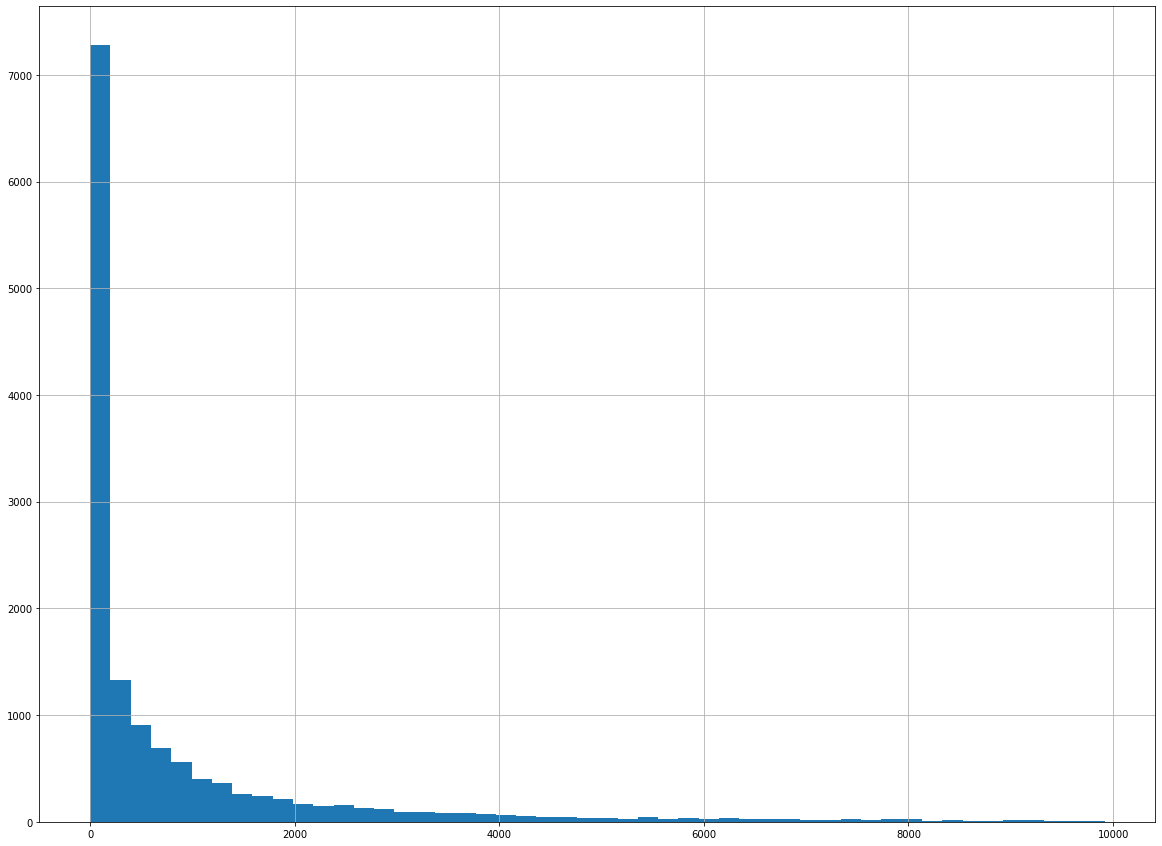

In [46]:
income_plot=spatially_explicit_rhomis.loc[spatially_explicit_rhomis.loc[:,"total_income_USD_PPP_pHH_Yr"]<10000,'total_income_USD_PPP_pHH_Yr'].hist(bins=50,figsize=(20,15))
income_plot

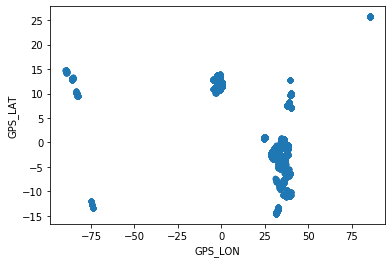

In [49]:
spatially_explicit_rhomis.plot(kind="scatter", x="GPS_LON", y="GPS_LAT")
#adding the term alpha helps us to see the areas where there is the greatest density

In [109]:
# shapefiles found here 
# https://hub.arcgis.com/datasets/a21fdb46d23e4ef896f31475217cbb08_1/data?geometry=16.453%2C-89.658%2C-18.703%2C82.868
import geopandas as gpd
import descartes 
world_shapefile=gpd.read_file(os.path.join('data', 'shapefiles', 'World'))
world_shapefile.head()
#world_shapefile.plot()

,OBJECTID,CNTRY_NAME,geometry
0,1,Aruba,"POLYGON ((-69.88223 12.41111, -69.94695 12.436..."
1,2,Antigua and Barbuda,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ..."
2,3,Afghanistan,"POLYGON ((61.27656 35.60725, 61.29638 35.62853..."
3,4,Algeria,"POLYGON ((-5.15213 30.18047, -5.13917 30.19236..."
4,5,Azerbaijan,"MULTIPOLYGON (((45.02583 41.03055, 45.00999 41..."


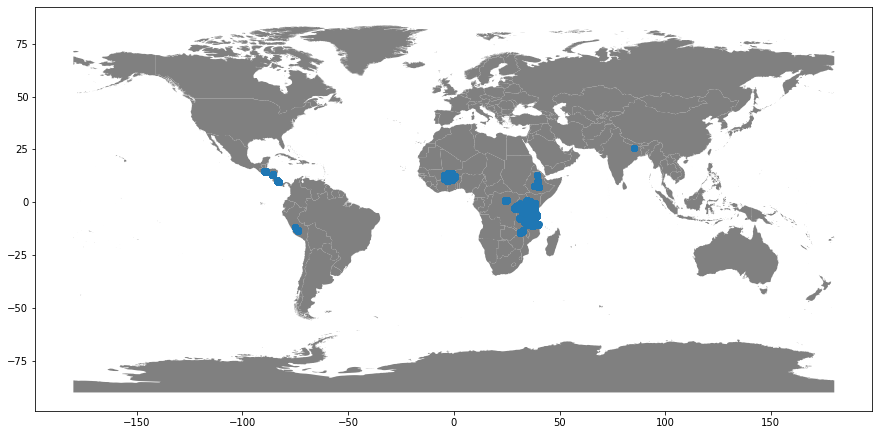

In [108]:
import shapely.geometry
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
#import mplleaflet


# "For all things raster" got to rasterio


dir(world_shapefile)
#world_shapefile.columns
bounds_for_country=world_shapefile.loc[world_shapefile.loc[:,"CNTRY_NAME"]=="Kenya",:].total_bounds
#world_shapefile.loc[world_shapefile["CNTRY_NAME"=="Kenya",]].bounds

xlim = ([bounds_for_country[0],  bounds_for_country[2]])
ylim = ([bounds_for_country[1],  bounds_for_country[3]])



#pyplot is a module of the matplotlib package
# zip returns a tuple while Point creates a geometrical point that can be understood
geometry=[Point(xy) for xy in zip(spatially_explicit_rhomis["GPS_LON"], spatially_explicit_rhomis["GPS_LAT"])]


# Define your coordinate reference system "crs". Most common uses latitude and long and code defined below
crs={'init' :'epsg:4326'}

#Converting our RHoMIS data frame into a geo-dataframe with a coordinate reference system and a geometry
spatially_explicit_rhomis=gpd.GeoDataFrame(spatially_explicit_rhomis,
                                          crs=crs,
                                          geometry=geometry)


rhomis_points, ax=plt.subplots(figsize=(15,10))
#ax.set_xlim(xlim)
#ax.set_ylim(ylim)
world_shapefile.plot(ax=ax, alpha=1, color="grey")
spatially_explicit_rhomis.plot(ax=ax)


# alternatively:
# import shapely
#geometry_of_rhomis_data=[shapely.geometry.Point(xy) for xy in zip(spatially_explicit_rhomis["GPS_LON"], spatially_explicit_rhomis["GPS_LAT"])]


array([33.90721893, -4.66961765, 41.90516663,  4.62249947])